In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(150)] + provided, 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-27 to 2019-06-07'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 10) & (stat['21-mean'] > 1.0)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
KO,50,3.515487,1.416569,2.356742,3.383611
MUB,50,1.056411,0.388981,2.260810,0.409122
MA,50,4.265388,1.900562,2.151147,5.698715
WM,50,3.390731,1.778167,1.807328,3.316666
BXMT,50,2.311529,1.212896,1.759862,2.677343
OKTA,50,13.558909,7.937724,1.685862,9.256045
SHOP,50,15.013560,9.504184,1.561056,6.171438
ZNGA,50,7.055365,4.667405,1.473702,4.700161
NTDOY,50,10.288634,7.053601,1.433542,7.386100


In [3]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 8, provided)

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'MA', 'WM'] 27.541911212633227 38.83933074869054 7.9254460505474364 -19.22286558660475
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'MA', 'OKTA'] 25.032197581795202 34.72330614810445 9.410290759493957 -19.1013993258032
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'MA', 'SHOP'] 22.60084899071481 32.93830281410311 8.63913899844127 -18.97659282182957
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'MA', 'ENPH'] 22.335247565660232 32.2209067389069 8.815126538105531 -18.700785711352196
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'MA', 'DIS'] 22.06019530650157 31.6138717742856 8.629298644156234 -18.182975111940266
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'WM', 'OKTA'] 20.935499852554912 30.87830203192042 8.814778543209327 -18.757580722574836
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'WM', 'SHOP'] 19.371460415482336 29.960607851926902 8.04362678215664 -18.63277421860121
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'KO', 'WM', 'NTDOY'] 19.150173770095265 29.

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ENPH', 'DIS', 'WMT']

In [4]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 8, provided + ['ZNGA', 'NTDOY'], 5, 6)

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'KO'] 14.762562579877212 24.241030886513244 8.693165993704861 -18.17163430034089
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'WM'] 12.989604589152613 21.935395649496463 8.676429740729864 -17.622220801073716
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'OKTA'] 12.302103180372963 19.64158327096874 10.161274449676384 -17.500754540272162
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'SHOP'] 11.55092843787764 19.536753785552477 9.390122688623697 -17.375948036298535
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'DIS'] 9.409111913500443 16.61115990557101 9.380282334338663 -16.58233032640923
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'NTDOY', 'ENPH', 'DIS'] 9.226571938266954 15.696359576046731 9.924089093892752 -16.39387673167253
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'DIS', 'WMT'] 8.7551728756691 16.280938316925972 8.369558910604107 -15.895324351860982


['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'DIS', 'WMT']

In [5]:
quote.setup_mask(['NTDOY', 'ZNGA', 'DIS'])
quote.find_optimal_ratio(21, 8)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 NTDOY    0.262264
 ZNGA     0.691969
 DIS      0.045767
 dtype: float64, 7.9499, 3.7275)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,7.990704,3.726662,1.146638,4.989378,8.075434,10.450742,16.621998,2.096703,4.686789
ZNGA,50.0,7.055365,4.667405,-1.129942,3.542453,6.008303,10.743593,17.904763,1.473702,4.700161
NTDOY,50.0,10.288634,7.053601,-1.587664,4.515010,9.809697,14.693490,27.448683,1.433542,7.386100
DIS,50.0,8.072011,10.287491,-5.549171,0.025893,2.336844,17.591158,26.877040,0.767438,6.132077


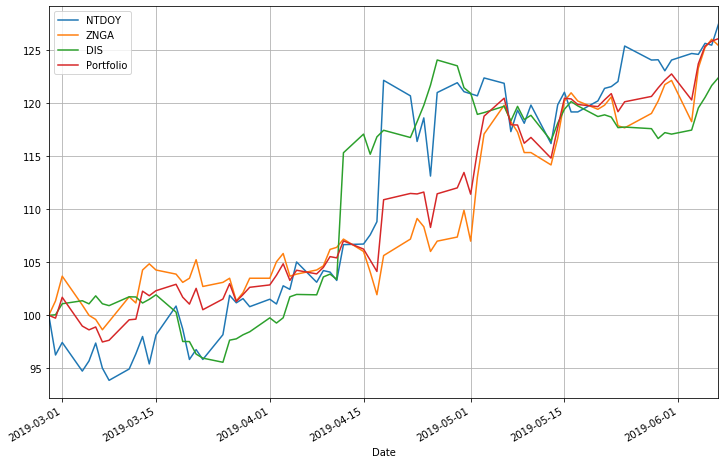

In [6]:
quote.graph(21, {'NTDOY': 0.318608, 'ZNGA': 0.681392})

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,7.846472,3.710771,0.857016,4.671416,8.129879,10.207038,16.526227,2.066813,4.598593
ZNGA,50.0,7.055365,4.667405,-1.129942,3.542453,6.008303,10.743593,17.904763,1.473702,4.700161
NTDOY,50.0,10.288634,7.053601,-1.587664,4.515010,9.809697,14.693490,27.448683,1.433542,7.386100
DIS,50.0,8.072011,10.287491,-5.549171,0.025893,2.336844,17.591158,26.877040,0.767438,6.132077


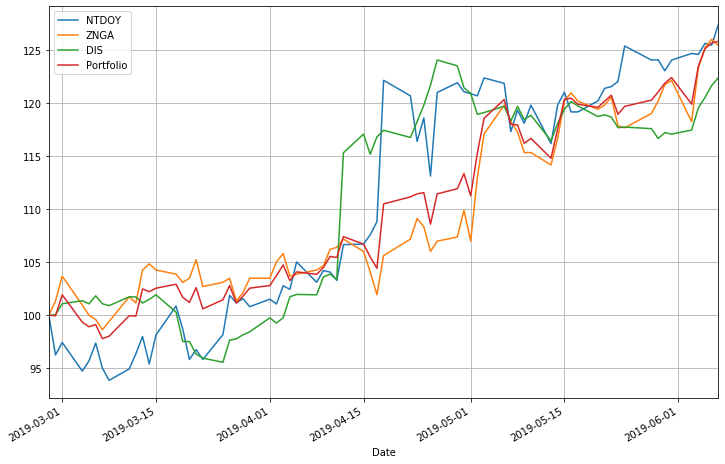

In [7]:
quote.graph(21, {'NTDOY': 0.262264, 'ZNGA': 0.691969, 'DIS': 0.045767})